<a href="https://colab.research.google.com/github/andersjes/Deep-Learning/blob/main/Ham10000_project_Anders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load dataset

In [1]:
### trying to load
!pip install "deeplake<4" # install the deeplake package

import deeplake # import the deeplake package

ds = deeplake.load('hub://activeloop/ham10000')
ds.summary()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.7/617.7 kB 23.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 6.6 MB/s eta 0:

/usr/local/lib/python3.10/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.0.0) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
-

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/ham10000



\

hub://activeloop/ham10000 loaded successfully.

Dataset(path='hub://activeloop/ham10000', read_only=True, tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])

      tensor           htype            shape           dtype  compression
      -------         -------          -------         -------  ------- 
       ages         class_label       (10015, 1)       uint32    None   
      genders       class_label       (10015, 1)       uint32    None   
     image_ids      class_label       (10015, 1)       uint32    None   
      images           image     (10015, 450, 600, 3)   uint8    jpeg   
 lesion_categories  class_label       (10015, 1)       uint32    None   
    lesion_ids      class_label       (10015, 1)       uint32    None   
   localizations    class_label       (10015, 1)       uint32    None   
      sources       class_label       (10015, 1)       uint32    None   


##Inspect data

(450, 600, 3)


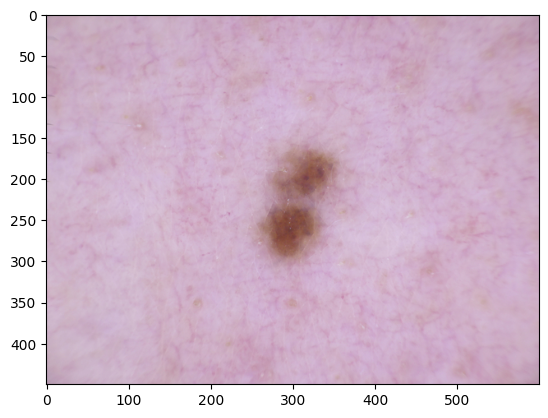

In [5]:
import matplotlib.pyplot as plt
# showcase a single image
image = ds.images[0].numpy()

print(image.shape) # shape of the images
#show the image
plt.imshow(image)
plt.show()


In [6]:
# Check the first few entries of the dataset
for sample in ds[:5]:
    print(sample)

Dataset(path='hub://activeloop/ham10000', read_only=True, index=Index([0]), tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])
Dataset(path='hub://activeloop/ham10000', read_only=True, index=Index([1]), tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])
Dataset(path='hub://activeloop/ham10000', read_only=True, index=Index([2]), tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])
Dataset(path='hub://activeloop/ham10000', read_only=True, index=Index([3]), tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])
Dataset(path='hub://activeloop/ham10000', read_only=True, index=Index([4]), tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])


##Data loader

In [4]:
import numpy as np

images = []
labels = []
max_samples_per_label = 1000

unique_labels = np.unique(ds.lesion_categories.numpy())

for label in unique_labels:
    label_indices = np.where(ds.lesion_categories.numpy() == label)[0]
    selected_indices = label_indices[:max_samples_per_label]

    for idx in selected_indices:
        images.append(ds.images[int(idx)].numpy()) # Cast idx to int using int(idx)
        labels.append(ds.lesion_categories[int(idx)].numpy()) # Cast idx to int using int(idx)




KeyboardInterrupt: 

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Preprocess images: resize to 128x128 and normalize
images = np.array([img_to_array(array_to_img(image, scale=False).resize((128, 128))) for image in images])
images = images / 255.0  # Normalize pixel values between 0 and 1

# Convert labels to a flat array
labels = np.array(labels).flatten()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#print number of pictures for each label
print(np.unique(labels, return_counts=True))

(3278, 128, 128, 3)
(3278, 7)
(820, 128, 128, 3)
(820, 7)
(array([0, 1, 2, 3, 4, 5, 6], dtype=uint32), array([1000, 1000,  115, 1000,  142,  514,  327]))


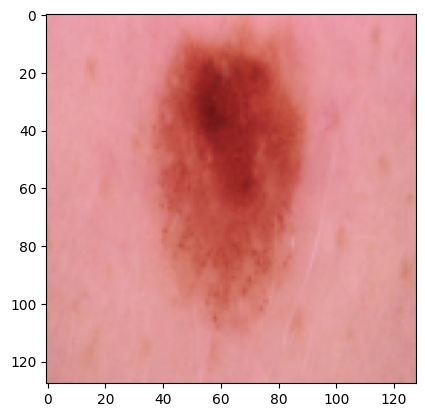

[0. 1. 0. 0. 0. 0. 0.]


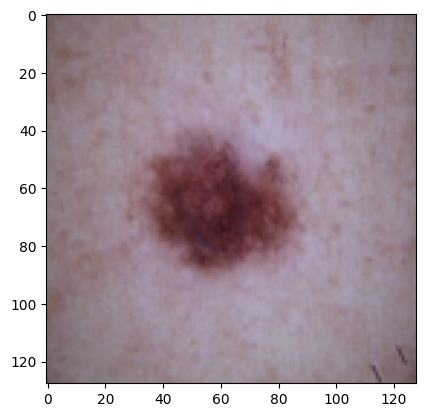

[0. 1. 0. 0. 0. 0. 0.]


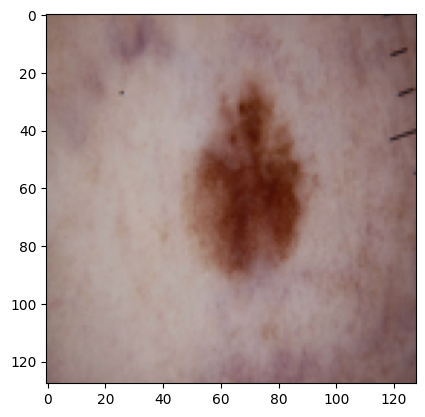

[0. 1. 0. 0. 0. 0. 0.]


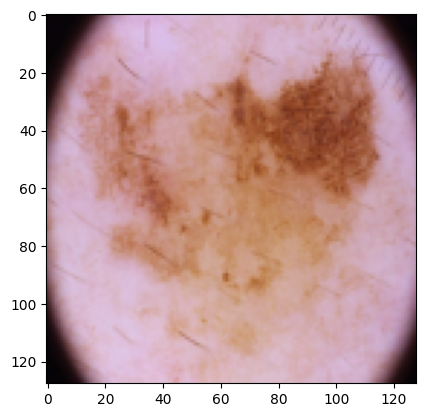

[0. 0. 0. 1. 0. 0. 0.]


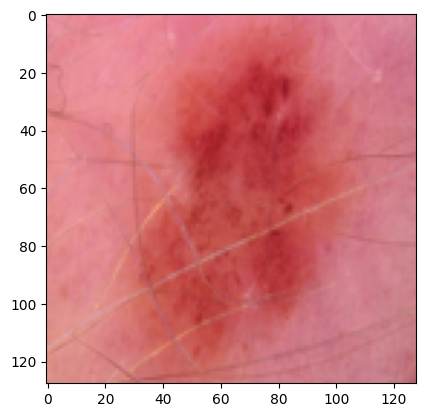

[0. 1. 0. 0. 0. 0. 0.]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),  # 1st Conv Layer with input shape
    layers.MaxPooling2D((2, 2)),  # 1st MaxPooling Layer
    layers.Conv2D(64, (3, 3), activation="relu"),  # 2nd Conv Layer
    layers.MaxPooling2D((2, 2)),  # 2nd MaxPooling Layer
    layers.Conv2D(64, (3, 3), activation="relu"),  # 3rd Conv Layer
    layers.Flatten(),  # Flatten the 2D output into 1D
    layers.Dense(64, activation="relu"),  # Fully connected layer
    layers.Dense(7, activation="softmax"),  # Output layer with 7 classes (use softmax for multi-class classification)
])

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='categorical_crossentropy',  # Cross-entropy loss for multi-class classification
              metrics=['accuracy'])  # We want to track accuracy during training

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Train the model on 80% of the training data, use 20% for validation

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_acc}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       3,211,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,268,103 (12.47 MB)

 Trainable params: 3,268,103 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.2786 - loss: 1.8926 - val_accuracy: 0.3735 - val_loss: 1.5426
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.3779 - loss: 1.5703 - val_accuracy: 0.4009 - val_loss: 1.4738
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4142 - loss: 1.4884 - val_accuracy: 0.4268 - val_loss: 1.3998
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4495 - loss: 1.3916 - val_accuracy: 0.5381 - val_loss: 1.2391
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5060 - loss: 1.2577 - val_accuracy: 0.5412 - val_loss: 1.1922
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5617 - loss: 1.1632 - val_accuracy: 0.5381 - val_loss: 1.1997
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5764 - loss: 1.1092 - val_accuracy: 0.5488 - val_loss: 1.1861
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6237 - loss: 1.0158 - val_accuracy: 0.5747 - 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import set_random_seed

set_random_seed(0) # make weight initialization deterministic

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(266)) # W1*x + b
model.add(Activation('relu')) # ReLU(W1*x + b)
model.add(Dropout(0.5))
model.add(Dense(7)) # W2*x + b
model.add(Activation('softmax')) # softmax(W2*x + b)

In [ ]:
#print first 5 predictions
print(model.predict(X_test[:5]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
[[0.1140715  0.14848928 0.14882642 0.15843152 0.14653316 0.14996503
  0.13368315]
 [0.11898295 0.14880225 0.14725645 0.15558696 0.1451262  0.14749178
  0.1367534 ]
 [0.11958476 0.14989774 0.14507961 0.1549974  0.14305064 0.14704385
  0.14034596]
 [0.1140099  0.15074988 0.14614145 0.1597842  0.14702316 0.14721648
  0.13507491]
 [0.11583133 0.15390684 0.14573558 0.15824234 0.1429439  0.14930911
  0.13403085]]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

# Initiate Adam optimizer (a variant of Stochastic Gradient Descent)
# (Note: this choice is somewhat arbitrary - see options here: https://keras.io/api/optimizers/)
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)
opt = Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Normalize image data
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255.0  # Normalize images to range [0, 1]
x_test /= 255.0


data_augmentation = True
epochs = 10
batch_size = 16

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit(datagen.flow(x_train, y_train,
                           batch_size=batch_size),
              epochs=epochs,
              validation_data=(x_test, y_test),
              #workers=4,
              shuffle=True)

Using real-time data augmentation.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


205/205 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - accuracy: 0.2292 - loss: 1.8084 - val_accuracy: 0.2439 - val_loss: 1.7219
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.2335 - loss: 1.7523 - val_accuracy: 0.2439 - val_loss: 1.7176
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.2539 - loss: 1.7260 - val_accuracy: 0.2573 - val_loss: 1.7053
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - accuracy: 0.2612 - loss: 1.6866 - val_accuracy: 0.3329 - val_loss: 1.5860
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.3191 - loss: 1.6082 - val_accuracy: 0.3671 - val_loss: 1.5477
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.3421 - loss: 1.5973 - val_accuracy: 0.3866 - val_loss: 1.5204
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.3759 - loss: 1.5780 - val_accuracy: 0.3805 - val_loss: 1.5168
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.3751 - loss: 1.5498 - val_accura

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


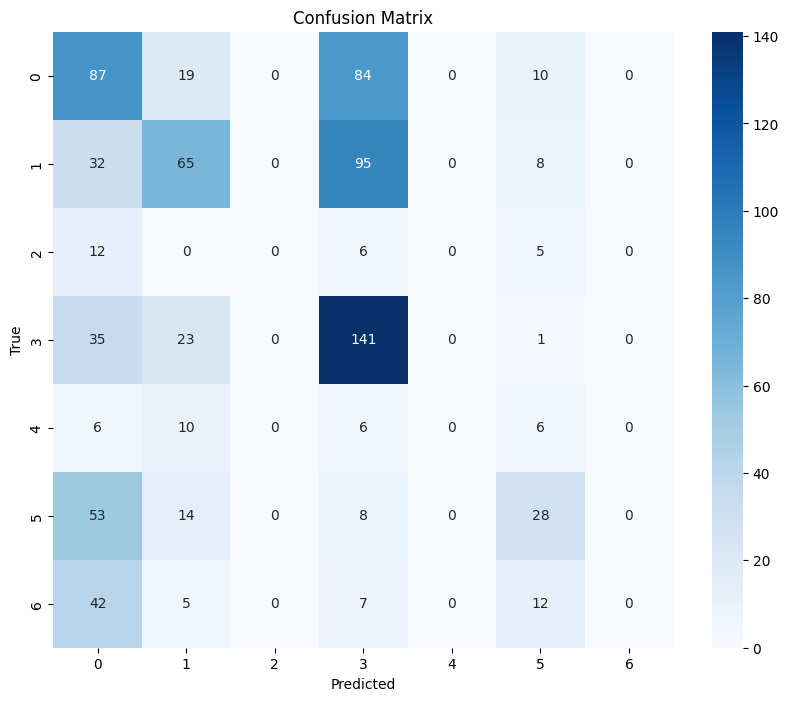

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'model', 'x_test', and 'y_test' defined
# and 'results = model.evaluate(x_test, y_test, batch_size=32)' has been executed

# 1. Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
#print(y_pred_classes)

# 2. Get true labels
y_true_classes = np.argmax(y_test, axis=1)
#print(y_true_classes)

# 3. Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 4. Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2', '3', '4', '5', '6'],
            yticklabels=['0', '1', '2', '3', '4', '5', '6'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()